<center><b><h1> Otimização de Sistema de Reatores Multileito utilizando PySwarm </h1></b></center>


Problema de otimização estudado e solucionado durante a disciplina de Engenharia de Reações Químicas no Programa de Pós-Graduação em Engenharia Química da Universidade Estadual de Maringá no ano de 2022.

# Descrição do problema - Parte 1 - Reator Multileito sequencial com Pressão constante

Durante as aulas da disciplina do mestrado, estudamos a reação de produção de Trióxido de Enxofre ($SO_3$) a partir de Dióxido de Enxofre ($SO_2$) e Oxigênio ($O_2$) a partir de uma reação catalisada com Pentóxido de Vanádio ($V_2O_5$). Durante as aulas, foram analisados algumas condições de arranjos de reatores para estudar qual seria o comportamento físico esperado nestes arranjos. 

Em um dos arranjos, propôs-se a utilização de um sistema com três reatores sequenciais PBR sequenciais, alternados com um trocador de calor para refrigerar a corrente de saída. A ideia por trás desse sistema de reatores multileito é que existe uma necessidade de controle de uma das variáveis do processo, como por exemplo controle de temperatura de uma reação. Dessa forma, operamos o primeiro reator até um valor próximo ao limite, depois resfriamos a corrente de produtos e então vamos ao segundo reator, e assim por diante.

<img src="img/arranjo_reatores_problema.png" width = "700">

Cada reator desse sistema multileito irá operar dentro de um intervalo de temperatura limite, onde a temperatura de alimentação é limitada à um valor mínimo relativo à utilidade fria, enquanto que a temperatura máxima permitida para cada reator será o limite físico do equipamento. 

Após reproduzir os cálculos definidos no livro de referência (Fogler Elements of Chemical Reaction Engineering, 1994), alguns questionamentos surgiram sobre outras situações. Entre estes questionamentos, surgiu uma em particular que foi o alvo de estudo nesse projeto: 

***Nesse arranjo de reatores sequenciais intercalados com resfriamento (Sistema Multileito), em quanto conseguimos reduzir a massa de catalisador se alterarmos as condições iniciais de operação?***

Em outras palavras:

***Como podemos Otimizar as Condições iniciais de maneira a reduzir a massa de catalisador total necessária?***

Portanto, foi proposto avaliar um sistema reacional com três reatores químicos que seguem o arranjo descrito acima sob à ótica da otimização de processos, cujo objetivo é resolver um problema de **Minimização da Massa de Catalisador utilizada no Sistema de Reação Química**, já que a massa do catalisador costuma normalmente ser responsável pelo maior custo em boa parte dos processos químicos. Como se trata de um problema de uma certa complexidade, buscou-se apenas representar neste documento a resolução do problema de otimização e as equações utilizadas de maneira direta, sem trabalhar tanto a dedução das equações e o trabalho matemático mais pesado (Para isso, acessar o livro Fogler ou o arquivo disposto em Anexo). Ainda, optou-se por manter a pressão na alimentação do sistema constante com o valor fornecido pela literatura para o problema (P0 = 2 atm).

Por se tratar de uma problemática com um sistema de equações relativamente complexo, algumas **Simplificações/Considerações** foram realizadas para reduzir a complexidade do equacionamento entre a relação de Conversão e Temperatura, de forma à permitir uma análise mais simples e direta da problemática. A validade destas simplificações pode e deve ser questionada, no entanto, como se trata de um conhecimento empírico e já avaliado anteriormente, podemos tomar essa simplificação na maior parte das vezes. Veja a seção de [Simplificação na relação de Conversão (X) e Temperatura (T)](#simplification)

Um outro comentário importante é que o problema parte de um exercício já resolvido e avaliado na disciplina. Por esse motivo, alguns conhecimentos sobre o sistema já são conhecidos. Por exemplo, para o reator multitubular proposto, chegamos à uma conversão de aproximadamente 91%. Por este motivo, a otimização deste trabalho terá como alvo obter uma Conversão de 90% para o sistema reacional também, sendo uma das premissas do problema.

# Condições iniciais do problema e Equacionamentos


## Relações Estequiométricas


No estudo, 7900 lbmol/h são alimentados no reator, numa composição de 11% de A ($SO_2$ - Limitante), 10% de B ($O_2$), 0% de C($SO_3$) e 79% de Inertes (I). A reação ocorre em fase gasosa e **há variação de vazão volumétrica** devido à estequiometria da reação, que são descritas abaixo:


<img src="img/relacoes_estequiometricas.png" width = "300">


## Velocidade de Reação($-r_A$), constante de velocidade de reação($k$) e constante de equilíbrio química ($K_p$)

A velocidade de reação definida para o componente limitante ($SO_2$) assume duas formas distintas, dependendo da conversão da reação. 

Para reação com conversão (X) < 5%, utilizaremos a equação cinética base (universal):

<img src="img/taxa_reacao_1.png" width = "350">

Para reação com conversão (X) > 5%, a equação anterior pode ser simplificada como sendo:

<img src="img/taxa_reacao_2.png" width = "325">

Se uma reação começa apenas com reagentes, então ela será representada inicialmente a primeira forma até que haja 5% de produtos formados em relação ao total de reagentes alimentados, e então assumirá a segunda forma após esse ponto.

A constante de velocidade de reação ($k$) é dado pela equação:

<img src="img/constante_velocidade_reacao.png" width = "500">

A constante de Equilíbrio Químico ($Kp$) é dada pela equação:

<img src="img/constante_equilibrio_quimico.png" width = "400">

Além disso, no Equilíbrio Químico a taxa de velocidade de reação ($-r_A$) é nula, já que o equilíbrio foi alcançado. Com isso, substituímos $-r_A=0$ no equacionamento e chegamos à uma equação não linear que nos permite encontrar a conversão de equilíbrio (condição limite) para cada temperatura. Portanto, ao substituímos os termos de $k$ e $K_p$ e os termos de pressão na equação de $-r_A$ e considerarmos $-r_A = 0$, chegamos à uma equação não linear direta, função apenas de Temperatura, que nos retorna o valor de XEQ. Lembrando que utilizaremos o equacionamento de $-r_A$ universal.


## Balanço de Massa e Balanço de Energia

O balanço de Massa, que irá descrever o consumo/formação dos componentes no meio reacional, é descrito em função de conversão e segue representado abaixo:

<img src="img/balanco_massa.png" width = "180">

Já o Balanço de energia, que irá descrever o comportamento da temperatura no meio reacional, é derivado do balanço de energia com reação química:

<img src="img/balanco_energia_1.png" width = "1000">

Após simplificações do modelo, chegamos à seguinte equação:


<img src="img/balanco_energia_2.png" width = "350">


Os termos de $C_p$, $\theta$, $\Delta H_{RX}$, para os componentes envolvidos nessa reação específica, estão descritos abaixo:

<img src="img/cps.png" width = "600">

<br>

<img src="img/cps_hrx_deltacp.png" width = "730">


<a id='simplification'></a>
## Simplificação na relação de Conversão (X) e Temperatura (T)

A princípio, a relação entre Conversão e Temperatura é originada das relações diferenciais entre Balanço de Energia e Balanço de Massa. Para um reator adiabático, operando com fluidos não viscosos e com variação de capacidade calorífica desprezível, fazemos algumas simplificações iniciais e chegamos à seguinte equação:

<img src="img/conversao_funcao_temperatura.png" width = "425">

Onde $X_n$ indica a conversão ao final de um reator n, $X_{n-1}$ a conversão no reator anterior ao n e o termo restante uma constante aproximada que multiplica a variação de temperatura. 

De acordo Fogler (Elements of Chemical Reaction Engineering, 1994), podemos simplificar a relação entre X e T como sendo uma relação linear simples. Como referência, temos abaixo uma figura do material de apoio desenvolvido sobre o conteúdo do próprio livro do Fogler, onde temos a justificativa da simplificação:

<img src="img/fogler_img.png" width = "700">

Portanto, o comportamento de X em função de T é uma reta e pode ser encontrado diretamente por uma regressão após simular um reator inicial. 


# Começando a resolução

## Importando as bibliotecas

In [1]:
# importando bibliotecas necessárias

import numpy as np
from scipy.optimize import fsolve
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import pyswarm as ps
import pandas as pd
import seaborn as sns


## Funções definidas inicialmente

- XEQ: Calcula e retorna o valor da Conversão de Equilíbrio em função de temperatura 

- X_calc: Calcula conversão do reator n ($Xn$) a partir dos parâmetros de uma relação linear -> f(T) = a1*T+a0

- closest: encontra o valor mais próximo de um valor em uma matriz de uma única coluna. Parte de um valor alto (100) como start para garantir que um valor de diferença menor existirá.



In [3]:
def XEQ(X, T):
    Kp = np.exp(42311/R/T-11.24)
    f =((1-X)/X)**0.5*(PA0*(tb-0.5*X)/(1-0.055*X)-(X/(1-X)/Kp)**2)    
    return f

def X_calc(a1, a0, T):
    return a1*T+a0

def closest(matrix, value):
    menor = 100
    line = 0
    for i in range(len(matrix)):
        diff = abs(matrix[i]-value)
        if diff<menor:
            line = i
            menor = diff
    return line





## Inicializando variáveis iniciais do problema

Por definição, uma reação química não pode ultrapassar a conversão de equilíbrio. Ou seja, dado uma condição inicial de alimentação, o máximo que podemos converter de um reagente em produto é limitado pela curva de equilíbrio para as condições do problema.

Como estamos avaliando um problema de sistema de reatores químicos, e sabe-se que a reação química não é irreversível (ou seja, a conversão de equilíbrio tende à um valor unitário), precisamos encontrar o comportamento da conversão máxima possível para o intervalo de temperatura no qual os reatores irão operar.



### Parâmetros para equação de Conversão de Equilíbrio (XEQ)

`T_points`: pontos de temperatura igualmente espaçados entre 1200 e 1800 °R

`P0`: pressão inicial total do sistema

`PA0`: pressão parcial do componente A no sistema

`tb`(theta_b): razão estequiométrica entre o componente B e o reagente limitante A 

`R`: Constante dos gases ideais na unidade adequada

`initial_guess`: Chute inicial de conversão para startar o problema

`XEQ_data`: vetor inicialmente vazio, que será populado durante a otimização


In [4]:
# Parâmetros da equação de XEQ
T_points = np.linspace(1200, 1800, 301)
P0 = 2
PA0 = 0.11*P0
tb = 0.1/0.11
R = 1.987 
initial_guess = [0.99]
XEQ_data = []

# Calculando os valores da curva de XEQ (Conversão máxima, no equilíbrio) para os pontos de temperatura

### Montando a curva de Conversão de equilíbrio como sendo um polinômio de segundo grau

Teremos `T_points` pontos de temperatura e em cada um desses pontos iremos calcular o valor de XEQ, e então com esses dados, faremos um ajuste polinomial utilizando a função `np.polyfit` do NumPy.


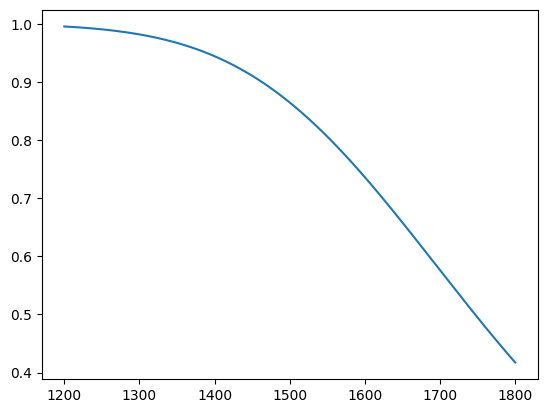

In [5]:
for T in T_points:
    # Para cada ponto de Temperatura, Resolve a Equação XEQ
    XEQ_calc = fsolve(lambda X:XEQ(X, T), initial_guess)
    XEQ_data.append(XEQ_calc[0])
        
a2, a1, a0 = np.polyfit(T_points, XEQ_data, deg=2) 
XEQ_fit = [(a2*T**2 + a1*T + a0) for T in T_points]
    
# visualizando curva de XEQ
plt.plot(T_points, XEQ_data, '-', label='XEQ Data')

## Equação diferencial para Otimizar a massa de Catalisador.



Para o problema de reatores multileito, teremos para cada reator várias equações diferenciais que irão determinar seu comportamento. Com manipulações das equações de balanços de massa e energia, chegamos à uma equação que assume forma algébrica, de forma que podemos relacionar as variáveis X e T ao eliminar o termo de Massa de catalisador, como já vimos [aqui!](#simplification)

Já quando vamos avaliar a massa de catalisador necessária para chegar à tal Conversão/Temperatura em cada reator, precisamos ainda utilizar as equações diferenciais de balanço de massa e balanço de energia individualmente. Assim, precisamos definir uma função EDO no Python que irá receber essas duas equações diferenciais e resolvê-las simultaneamente.

A função foi foi definida na função EDO(t,y), onde t normalmente é tempo, mas no problema trataremos como sendo Massa de Catalisador. A variável y se refere à duas variáveis independentes, no caso X e T. Além disso, teremos uma lista de parâmetros sendo inicializados abaixo, que serão utilizadas ao longo da solução do sistema de equação algébrico-diferencial:


### Parâmetros para solução das equações algébricas e diferenciais

TR = Temperatura de referência para qual se sabe o parâmetro de Entalpia de Reação

HRX0 = Entalpia de Reação inicial (na temperatura de Referência)

alfa, beta, gamma: Parâmetros para equação de entalpia de reação 

U: Coeficiente global para trocadores de calor

Ta: Temperatura do fluido de resfriamento (°R)

E: Epsilon -> Parâmetro da equação de estequiometria relativa à diferença de vazão volumétrica dos gases

Fa0: Vazão molar do componente a (lbmol/h)

tc(theta_c): razão estequiométrica entre o componente C e o reagente limitante A

ti = razão estequiométrica de componentes inertes em relação ao reagente limitante B (controle de temperatura)



A função será otimizada via PSO (Particle Swarm Optimization) utilizando a biblioteca pyswarm.

Para executar a otimização, utilizamos a função pso, que irá receber alguns parâmetros para ser aplicada. Um destes parâmetros é a função à ser otimizada, que segue descrita abaixo.

In [6]:
# Parâmetros da equação de Xn
TR = 1260


# Dados para equação de Balanço de Energia
HRX0 = -42471
alfa = -1.5625
beta = 2.7225e-3
gama = -7.377e-7
U = 10
Ta = 1265
E = -0.055
Fa0 = 7900*0.11
tc = 0
ti = 0.79/0.11

def EDO(t,y):  

    # Definindo EDO com 2 variáveis: Conversão (X) e Temperatura (T) independentes e uma variável dependente (W)
    # t = W, y[0] = X, y[1] = T
    X = y[0]
    T = y[1]
    
    HRX = HRX0+alfa*(T-TR)+beta/2*(T**2-TR**2)+gama/3*(T**3-TR**3)
    
    a_cp = 7.208+tb*5.731+tc*8.511+ti*6.248
    b_cp = 5.633e-3+tb*2.323e-3+tc*9.517e-3+ti*8.778e-4
    g_cp = -1.343e-6+tb*-4.886e-7+tc*-2.325e-6+ti*-2.13e-8
    
    sum_CPi = a_cp+b_cp*T+g_cp*T**2
    
    dCP = -1.5625+2.7225e-3*T-7.377e-7*T**2

    k = 3600*np.exp(-176008/T-(110.1*np.log(T))+912.8)
    KP = np.exp(42311/R/T-11.24)
    
    P = P0
    PA = PA0*(1-X)/(1+E*X)*P/P0
    PB = PA0*(tb-1/2*X)/(1+E*X)*P/P0
    PC = PA0*X/(1+E*X)*P/P0

    if X <= 0.05:
    
        rA = -k*(0.848-0.012/(KP)**2)
    
    else:
    
        rA = -k*(PA/PC)**0.5*(PB-(PC/KP/PA)**2)
        
    dx_dW = -rA/Fa0 
    dT_dW = ((-rA)*(-HRX))/(Fa0*(sum_CPi+X*dCP)) 
   

    return [dx_dW, dT_dW]


# Definindo o problema de Otimização

Como objetivo do problema de otimização, buscamos minimizar a massa de catalisador total, ou seja, a soma das massas de catalisadores dos reatores individuais.

A ideia por trás do reator multileito é que existe uma necessidade de controle, como por exemplo controle de temperatura de uma reação. Dessa forma, operamos o primeiro reator até um valor próximo ao limite, depois resfriamos a corrente de produtos e então vamos ao segundo reator, e assim por diante.

Cada reator desse sistema multileito irá operar dentro de um intervalo, onde a temperatura de alimentação é limitada à um valor mínimo relativo à utilidade fria, enquanto que a temperatura máxima permitida para cada reator será o limite físico do equipamento. 

No problema, temos que a utilidade fria opera à 1265 °R, o que é levemente superior à temperatura inicial descrita originalmente no Fogler (1200 °R) e manteremos essa temperatura como referência, portanto assumiremos que as temperaturas dos reatores (com exceção do primeiro) não poderá ser inferior à 1285 °R com intuito de manter aproximadamente 20 °R como intervalo mínimo de troca térmica entre corrente quente e fria. Já a temperatura máxima de operação não poderá ultrapassar 1575 °R. 

Assim, o limite de temperatura dos reatores pode ser descrito pelo intervalo [1285,1575], no entanto não iremos limitar o valor de temperatura de entrada de cada reator ou de saída à valores próximos do limite. 

Um outro ponto destaque do problema é que buscaremos uma produção mínima de pelo menos 90% da alimentação total. Ao observar o gráfico de conversão de equilíbrio, vemos que para manter uma conversão superior a 90% precisamos que a saída do reator esteja em temperaturas inferiores à 1450 °R. Por esse motivo, utilizaremos esse valor como limite térmico superior para o 2° e 3° reator!

Dado esses pontos, iremos então definir uma função `func_otimization` que irá retornar o valor do total da massa dos reatores químicos após a solução do sistema de equações algébrico-diferencial. Essa função será então implementada em um algoritmo de otimização não-parametrizado de Enxame de Partículas (biblioteca PySwarm), onde os dados para a solução da equação diferencial serão alterados seguindo variações aleatórias nas variáveis de entrada. 

Podemos, por fim, descrever o problema de otimização como um problema que tenta resolver a seguinte premissa:

<img src="img/otimization_problem.png" width = 450>


## Definindo a função a ser otimizada

A função a ser otimizada é identificada como `func_optimization` retorna a soma das três massas de catalisadores, ou seja, `fobj = W_total` (Massa total de catalisador). Para calcular isso, precisamos calcular individualmente a massa de catalisador em cada um dos reatores, o que envolve resolver todo o sistema de equações algébrico-diferenciais descrito previamente.  

Para resolver o problema, precisaremos tomar algum ponto de início arbitrário, mas que esteja próximo do intervalo de onde temos intenção de operar (no caso, entre 1200 e 1575 °R). Como desejamos operar um problema onde a conversão ao final de cada reator esteja entre 10% e 99% da conversão de equilíbrio na temperatura de saída do reator, utilizaremos $X_{EQs}$ arbitrários para determinar inicialmente a sensibilidade. O gráfico de XEQ pode nos dar um norte após termos calculado o coeficiente angular da reta que relaciona X e T para referência!

Por fim, iremos calcular todas as conversões finais após o último reator químico, e então, avaliaremos se a conversão é de fato superior à 90% ou não! Caso isso ocorrer, ou caso a temperatura ao final de um dos reatores atingir valor superior à 1575 °R, iremos alterar forçadamente o valor da massa de catalisador para flagear que a solução do problema fere algum dos limites. (Será tomado `W = 9999999` como valor flag para massa de catalisador, já que é bem superior ao esperado que teria valores inferiores a 300000 conforme já verificado em sala de aula). 

A função a ser otimizada está representada abaixo.

In [7]:
def func_optimization(parameters):
    global W_res, X_final
    flag = 0
    
    # XEQ_target: % de conversão máxima em relação à conversão de equilíbrio [0~1]*XEQ
    XEQ_target = [parameters[i] for i in range(3)]
    
    # T_HE: Temperaturas iniciais dos reatores -> T_HE[T1, T2, T3]
    T_HE = [parameters[i+3] for i in range(3)]
    
    # fobj -> W_total (massa total de catalisador)
    fobj = 0

    # Inicializando Matrizes para armazenar os resultados
    ## Temperatura: T_matrix: (3 x 301)
    ## Conversão: X = (3 x 301)
    ## Conversão Ajustada: X_fit = (3 x 301)
    ## Conversão Inicial: X_init = (3)
    ## Parâmetro a1 do fit de X: X_a1 = (3)
    ## Parâmetro a0 do fit de X: X_a0 = (3)
    ## Temperatura final após Conversão: T_X = (3)
    ## Conversão Final: X_res = (3)

    T_matrix = np.zeros((len(T_HE), len(T_points)))
    X = np.zeros((len(T_HE), len(T_points)))

    X_fit = np.zeros((len(T_HE), len(T_points)))
    X_init = np.zeros(len(T_HE))
    X_a1 = np.zeros(len(T_HE))
    X_a0 = np.zeros(len(T_HE))
    T_X = np.zeros(len(T_HE))
    X_res = np.zeros(len(T_HE))


    # i = índice do reator (0, 1, 2)
    for i in range(len(T_HE)):
        # Se não for o primeiro reator, a conversão continua do ponto final do reator anterior
        if i>0:
            X_init[i] = X_res[i-1]

        # Preenchendo a matriz de Temperatura com valores igualmente espaçados entre o valor inicial de T_HE e um valor máximo de 1800 K
        T_matrix[i] = np.linspace(T_HE[i], 1800, 301)

        # j = índice do ponto de temperatura (0 a 100)
        # Calculando a conversão para cada ponto de temperatura (equacionamento envolvendo cpi e DeltaHRX)
        for j in range(len(T_points)):
            sum_cpi = 57.29*(T_matrix[i][j]-T_HE[i])+1.405e-2/2*(T_matrix[i][j]**2-T_HE[i]**2)-1.94015e-6/3*(T_matrix[i][j]**3-T_HE[i]**3)
            HRX = 42471+1.5625*(T_matrix[i][j]-TR)-2.7225e-3/2*(T_matrix[i][j]**2-TR**2)+7.377e-7/3*(T_matrix[i][j]**3-TR**3)
            X[i][j] = X_init[i]+sum_cpi/HRX


        # Ajustando os pontos de conversão e temperatura como uma reta
        X_a1[i], X_a0[i] = np.polyfit(T_matrix[i], X[i], 1)
        X_fit[i] = [X_calc(X_a1[i], X_a0[i], T) for T in T_matrix[i]]

        # Achando T que faz com que a conversão alvo (por exemplo, 0.99*XEQ) seja atingida pelo balanço de energia 
        # f(T) = 0 = XEQ_alvo(%)*XEQ - Xcalc (balanço de energia - ajuste) 
        T_X[i] = fsolve((lambda T: XEQ_target[i]*(a2*T**2+a1*T+a0)-(X_a1[i]*T+X_a0[i])), 1500)
        
        # Salvando o valor de conversão final para o reator i
        X_res[i] = X_calc(X_a1[i], X_a0[i], T_X[i])
        
    
    # Criando lista de valores de conversão inicial para cada reator (primeiro começa em 0) -> será a condição inicial da ED
        X_ic = [0]
  
    for i in range(len(T_HE)-1):
        X_ic.append(X_res[i])


    # Condição inicial: Para cada reator i, o ponto de início é em Conversão inicial X_ic[i] e temperatura inicial T_HE[i]. initial_cond recebe 3 pares de valores
    initial_cond = [[X_ic[i], T_HE[i]] for i in range(len(T_HE))]

    # Intervalo de W esperado (com base em problemas anteriores)
    W_interval = [[0, 60000], [0,60000], [0, 60000]]

    # Variável de saída W_res: lista que armazena a massa de catalisador de cada reator 
    W_res = []
    
        
    # Encontrando o valor de W mais próximo
    ## W_points: intervalo de pontos de W (massa de catalisador)
    
    for i in range(len(T_HE)):
        # criando pontos de W igualmente espaçados entre o intervalo de W dentro dos limites específicos de cada reator -> W_interval
        W_points = np.linspace(W_interval[i][0], W_interval[i][1], 5001)
        
        # Resolve a EDO
        resp = solve_ivp(EDO, W_interval[i], initial_cond[i], t_eval = W_points, method = "LSODA")
        
        # Outputs de resp:
        ## resp.t: pontos da variável dependente, no caso W (massa de catalisador)
        ## resp.y[0]: Conversão (X) em função de W
        ## resp.y[1]: Temperatura (T) em função de W
        
        # Como a solução da EDO não necessariamente retornará um valor próximo ao da integração calculada pelo método solve_ivp, precisamos encontrar
        # o valor mais próximo da conversão do final do reator. Fazemos isso com a função closest, que verifica qual o mais próximo valor de conversão
        # em relação ao valor de conversão final do reator i (X_res[i])        
        closest_index = closest(resp.y[0], X_res[i])

        # Se a temperatura do final do reator for maior que 1575 K, adiciona 1 à flag -> Facilita enxergar quando infringe o limite de temperatura
        if resp.y[1][closest_index] > 1575:
            flag += 1
        
        # Somamos o valor de W para cada reator, onde fobj é a W_total (massa total de catalisador)
        fobj = fobj + resp.t[closest_index]

        # Massa de cada reator individualmente
        W_res.append(resp.t[closest_index])

    # Busca-se atingir pelo menos 90% de conversão final na saída do último reator
    if X_res[-1] < 0.90 or flag>=1:
        fobj = 999999999

    X_final = X_res[-1]
    
    return fobj


## Iniciando o Algoritmo de Otimização

Com a função a ser otimizada definida, podemos chamá-la e calcular uma otimização via Enxame de Partículas, definindo um limite inferior e limite superior conforme especificado anteriormente.

O código abaixo o faz e retorna uma lista com os outputs relevantes, que serão tratados em sequência.

In [ ]:
ub = [0.65, 0.99, 0.99, 1575, 1450, 1450]
lb = [0.45, 0.75, 0.75, 1250, 1285, 1285]

# [6.31835956e-01, 9.53012415e-01, 9.84125845e-01, 1.29298866e+03, 1.33545613e+03, 1.36019967e+03]
results = []
n_iterations = 15

for i in range(n_iterations):
    
    xopt, fopt = ps.pso(func_optimization, lb, ub, maxiter = 40, debug = False)
    new_W_res = W_res.copy()
    new_X_final = X_final.copy()
    results.append([xopt, fopt, new_W_res, new_X_final])
    print(f"\n\n Iteração {i+1} Finalizada!\n\n\n\n")

print(results)

## Visualizando os dados do problema e encontrando o melhor resultado das condições operacionais do reator

Para visualizar as informações finais do reator otimizado, pegamos todos os resultados obtidos pelo algoritmo de otimização e separamos apenas o de melhor desempenho (menor massa de catalisador).

Iremos transformar os dados primeiramente para que sejam tabulados adequadamente para visualização, e então encontraremos o que possui menor massa e retornaremos os inputs para simular esse sistema de reatores.

In [83]:
def formatting_results(results):

    result_vectors = range(len(results))

    temperatures_flat = [float(results[i][0][j]) for i in result_vectors for j in range(3, 6)]
    temperatures_grouped = [temperatures_flat[i:i+3] for i in range(0, len(temperatures_flat), 3)]

    formated_results = {
        'xopt':[results[i][0] for i in result_vectors],
        'Temperatures': temperatures_grouped,
        'W_total':[float(results[i][1]) for i in result_vectors],
        'W_values':[[float(i) for i in results[i][2]] for i in result_vectors],
        'final_X':[float(results[i][3]) for i in result_vectors]
    #'final_XEQ': [XEQ(formated_results['final_X'[i]]) for i in result_vectors]
    }
    return formated_results

def valid_results(formated_results:dict):
    valid_indices = [i for i, x in enumerate(formated_results['final_X']) if x >= 0.9]
    filtered_results = {
        key: [values[i] for i in valid_indices]
        for key, values in formated_results.items()
    }
    return len(valid_indices), filtered_results

formated_results = formatting_results(results)
qtd_valid_results, valid_results_values = valid_results(formated_results)

print(f'Qtd de resultados = {n_iterations},\n resultados: {formated_results}')
print(f'\n\nQtd de resultados válidos (não infringem limite de temperatura): {qtd_valid_results},\n Valid_results: {valid_results_values}')


Qtd de resultados = 2,
 resultados: {'xopt': [array([5.13037069e-01, 9.31866331e-01, 9.89895082e-01, 1.34239174e+03,
       1.36445406e+03, 1.35062671e+03]), array([5.23099238e-01, 9.61603934e-01, 9.89467610e-01, 1.33154692e+03,
       1.38273077e+03, 1.35338633e+03]), array([5.66056290e-01, 9.53297557e-01, 9.89899713e-01, 1.32307423e+03,
       1.36125136e+03, 1.36653782e+03]), array([5.56051253e-01, 9.32669493e-01, 9.84682492e-01, 1.31138128e+03,
       1.35468674e+03, 1.35684506e+03]), array([5.20937682e-01, 8.59526630e-01, 8.24534351e-01, 1.56010309e+03,
       1.41453158e+03, 1.42972401e+03]), array([5.00418800e-01, 9.60429228e-01, 9.89322063e-01, 1.33037719e+03,
       1.37474003e+03, 1.35318663e+03]), array([5.20985414e-01, 9.50296188e-01, 9.89996444e-01, 1.34267448e+03,
       1.34387206e+03, 1.36481590e+03]), array([5.76629812e-01, 9.71563498e-01, 9.78615976e-01, 1.30741306e+03,
       1.38048588e+03, 1.35321679e+03]), array([6.34796469e-01, 9.49091561e-01, 9.74192449e-01, 1.5

In [ ]:
df = pd.DataFrame(valid_results_values)
df2 = df.copy()
df2[['W_reactor1', 'W_reactor2', 'W_reactor3']] = pd.DataFrame(df2['W_values'].tolist(), index=df2.index)
df2 = df2.drop(columns=['W_values'])
df2[['Temperature_reactor1', 'Temperature_reactor2', 'Temperature_reactor3']] = pd.DataFrame(df2['Temperatures'].tolist(), index=df2.index)
df2 = df2.drop(columns=['Temperatures'])
df2

,xopt,W_total,final_X,W_reactor1,W_reactor2,W_reactor3,Temperature_reactor1,Temperature_reactor2,Temperature_reactor3
0,"[0.6110448439732582, 0.9585283848964639, 0.989...",55476.0,0.900158,10452.0,17544.0,27660.0,1302.918226,1378.481527,1369.154235


In [17]:
df2[['Conversion_reactor1', 'Conversion_reactor2', 'Conversion_reactor3']] = pd.DataFrame(df2['xopt'].apply(lambda x: x[:3]).tolist(), index=df2.index)
ordem_colunas = ['xopt', 'W_reactor1', 'W_reactor2', 'W_reactor3', 'W_total',
          'Temperature_reactor1', 'Temperature_reactor2', 'Temperature_reactor3',
          'Conversion_reactor1', 'Conversion_reactor2', 'Conversion_reactor3',
          'final_X']
df2 = df2[ordem_colunas]

df2

,xopt,W_reactor1,W_reactor2,W_reactor3,W_total,Temperature_reactor1,Temperature_reactor2,Temperature_reactor3,Conversion_reactor1,Conversion_reactor2,Conversion_reactor3,final_X
0,"[0.6110448439732582, 0.9585283848964639, 0.989...",10452.0,17544.0,27660.0,55476.0,1302.918226,1378.481527,1369.154235,0.611045,0.958528,0.989981,0.900158


In [ ]:
# Adicionando valor de XEQ para temperatura no último reator ao dataframe df2:
df2['XEQ'] = [fsolve(lambda X:XEQ(X, T), initial_guess) for T in df2['Temperature_reactor3']]
df2


Retornando os melhores resultados

In [20]:
# Retornando o valor de xopt para a linha que possuir menor valor de W_total
if len(df2) == 1:
    best_xopt = df2['xopt'][0]
else:
    best_xopt = df2['xopt'][['W_total'].idxmin()]

W_total_best_xopt = df2['W_total'].tolist()
print(f'\n\n\nO valor de menor massa de catalisador é {W_total_best_xopt[0]} lbs')




O valor de menor massa de catalisador é 55476.0


# Visualizando a Operação e Desempenho do Cenário Otimizado

## Gráficos de Conversão em função de Tempo

Primeiramente, vamos reproduzir novamente o cálculo de XEQ (loop sistema não-linear) - Já calculado anteriormente


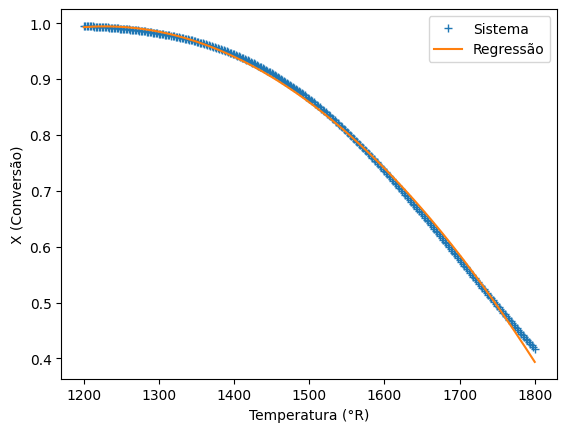

In [21]:
# visualizando curva de XEQ 
plt.plot(T_points, XEQ_data, "+", label = "Sistema")
plt.plot(T_points, XEQ_fit, "-", label = "Regressão")
plt.legend()
plt.xlabel("Temperatura (°R)")
plt.ylabel("X (Conversão)")
plt.show()


## Simulando o comportamento dos reatores para X em função de 

Agora iremos adicionar, uma a uma, as curvas de operação dos três reatores e retornar seus parâmetros de saída. Para isso, resolveremos novamente o sistema de equações algébrico-diferencial no caso otimizado.

Calcular os valores de X1, X2 e X3 e ajustá-los em retas individuais que sejam representativas.

Calcular qual T de saída resultaria na conversão da condição de X = uma dada fração de XEQ

Plotar gráfico de conversão dos 3 reatores com curvas até a temperatura de saída definidas no passo anterior

Dimensionar os reatores (definir massa de catalisador necessária para atingir conversão ou temperatura definida anteriormente)

In [22]:
# Parâmetros otimizados
parameters = best_xopt 
XEQ_target = [parameters[i] for i in range(3)]
T_HE = [parameters[i+3] for i in range(3)]

### Visualizando o comportamento linear de X em função de T para os três reatores:

Observação: veja que para o terceiro reator, temos a reta passando de valores de X = 1. Isso não ocorre na prática, tendo em vista que o limite de formação de produtos acaba em $X = X_{EQ}$. No entanto, optou-se por representar este comportamento não real mesmo assim, já que isso é fruto da aproximação da equação de conversão como uma regressão linear de temperatura. 

No gráfico onde juntamos a curva de XEQ e de conversão dos produtos, visualizamos de fato como será a operação limitada!

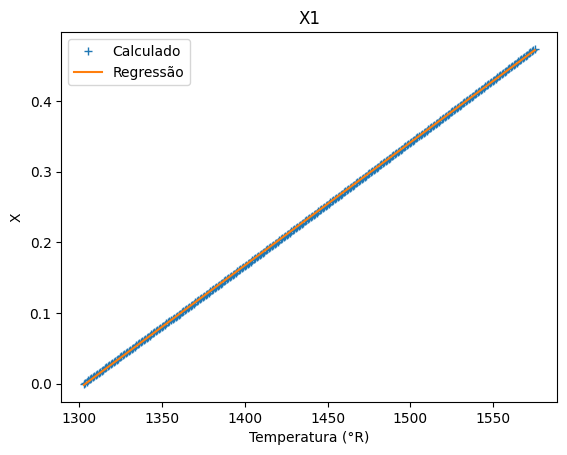

C:\Users\User\AppData\Local\Temp\ipykernel_39480\2682886781.py:38: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  T_X[i] = fsolve((lambda T: XEQ_target[i]*(a2*T**2+a1*T+a0)-(X_a1[i]*T+X_a0[i])), 1500)


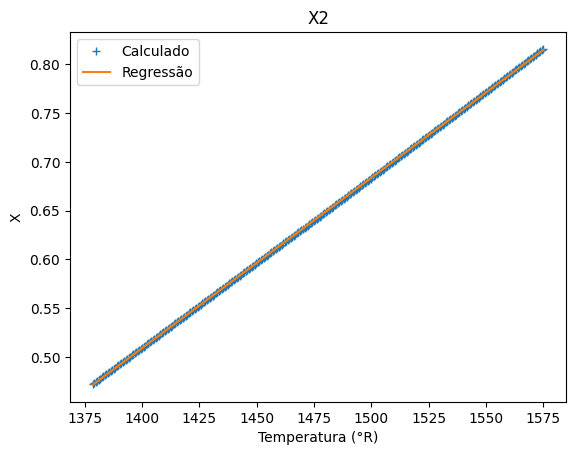

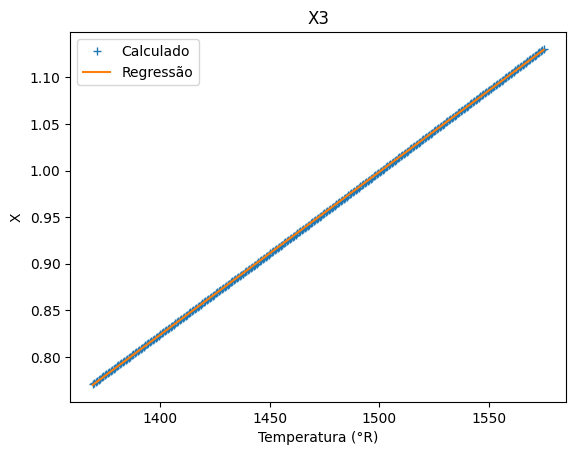

In [23]:
# Reatores 1, 2 e 3:

T_matrix = np.zeros((len(T_HE), len(T_points)))
X = np.zeros((len(T_HE), len(T_points)))
   
X_fit = np.zeros((len(T_HE), len(T_points)))
X_init = np.zeros(len(T_HE))
X_a1 = np.zeros(len(T_HE))
X_a0 = np.zeros(len(T_HE))
T_X = np.zeros(len(T_HE))
X_res = np.zeros(len(T_HE))


for i in range(len(T_HE)):
    
    if i>0:
        X_init[i] = X_res[i-1]
            
        T_matrix[i] = np.linspace(T_HE[i], 1575, 301)
    T_matrix[i] = np.linspace(T_HE[i], 1575, 301)
    
    for j in range(len(T_points)):
        sum_cpi = 57.29*(T_matrix[i][j]-T_HE[i])+1.405e-2/2*(T_matrix[i][j]**2-T_HE[i]**2)-1.94015e-6/3*(T_matrix[i][j]**3-T_HE[i]**3)
        HRX = 42471+1.5625*(T_matrix[i][j]-TR)-2.7225e-3/2*(T_matrix[i][j]**2-TR**2)+7.377e-7/3*(T_matrix[i][j]**3-TR**3)
        X[i][j] = X_init[i]+sum_cpi/HRX

    X_a1[i], X_a0[i] = np.polyfit(T_matrix[i], X[i], 1)
    X_fit[i] = [X_calc(X_a1[i], X_a0[i], T) for T in T_matrix[i]]
    
    plt.plot(T_matrix[i], X[i], "+", label = "Calculado")
    plt.plot(T_matrix[i], X_fit[i], label = "Regressão")
    plt.legend()
    plt.title("X"+str(i+1))
    plt.xlabel("Temperatura (°R)")
    plt.ylabel("X")
    plt.show()

    T_X[i] = fsolve((lambda T: XEQ_target[i]*(a2*T**2+a1*T+a0)-(X_a1[i]*T+X_a0[i])), 1500)
    X_res[i] = X_calc(X_a1[i], X_a0[i], T_X[i])
    
    
    

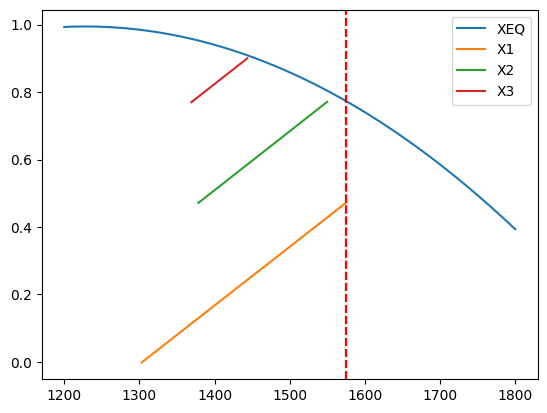

In [24]:
plt.plot(T_points, XEQ_fit, label = "XEQ")


for i in range(len(T_HE)):
    
    x_axis = np.linspace(T_HE[i], T_X[i], 301)
    y_axis = [X_calc(X_a1[i], X_a0[i], T) for T in x_axis]
    # Plotando uma linha vertical em T=1575
    plt.axvline(x=1575, color='r', linestyle='--')
    plt.plot(x_axis, y_axis, label = "X"+str(i+1))
    plt.legend()






In [27]:
# Resiçtadps finais:

for i in range(len(T_HE)):
    print("\nT"+str(i+1)+" = ", T_X[i])
    print("X"+str(i+1)+" = ", X_res[i])
    print("X[0]=",  X_calc(X_a1[i], X_a0[i], T_HE[i]))    
    
print(f"\nTotal de massa de catalisador: {W_total_best_xopt[0]} lbs")


T1 =  1575.2308833083937
X1 =  0.47229911554803916
X[0]= -0.0016676254275345137

T2 =  1549.76361171707
X2 =  0.7708657405961072
X[0]= 0.4714359206571128

T3 =  1443.5491254479837
X3 =  0.8999029902541309
X[0]= 0.7699177203905718

Total de massa de catalisador: 55476.0 lbs


# Conclusões Parciais

Este problema exemplo buscou demonstrar como funciona um problema de otimização de processos no contexto de um reator químico. A ideia era visualizar como um tipo de arranjo de reatores pode operar de formas distintas e como abordar isso utilizando conceitos de otimização não-paramétrica, no caso, utilizando a metodologia de Enxame de Partículas. 

Percebe-se que a complexidade do problema dificulta visualizar e contabilizar os fenômenos que estão ocorrendo, de forma que não é simples definir de fato quais as melhores condições operacionais de fato quando não utilizamos métodos paramétricos. No entanto, conseguiu-se um bom desempenho, reduzindo significativamente a massa de catalisador necessária, que era de 132 168,74 lbs de catalisador para um arranjo de reator multitubular, para uma quantidade inferior à 60 000 lbs (mais de 58% de redução). 

Vale ressaltar que este resultado avalia a situação em condição de pressão inicial constante, embora este seja um fator que afeta significativamente no desempenho do processo.



# Descrição do problema - Parte 2 - Reator Multileito Sequencial em diferentes Pressões de Alimentação

Durante as aulas, além dos balanços de massa e de energia, avaliamos também o balanco de momento e verificamos que a queda de pressão (DP/DW) calculado para um reator em **Condição Isotérmica e Equimolar**, teríamos uma perda de 0.76 atm para uma alimentação de 2 atm inicial em cada tubo de um reator multitubular (Fogler - 8-10.21). 

<img src="img/resultados_delta_p_fogler.png" width = "650">

Para uma pessoa com boa intuição neste problema, podemos supor que o aumento da pressão irá aumentar a concentração na superfície de catalisador, já que a concentração de um gás é diretamente proporcional à pressão do sistema. Consequentemente, com maiores concentrações poderíamos esperar maiores velocidades de reação? Ou, em outras palavras, conseguimos reduzir ainda mais a massa de catalisador necessária para alcançar uma determinada conversão?

Este será o alvo nesta próxima etapa. 

Observação: Não serão avaliados as quedas de pressão de cada situação, apenas refeitas as simulações alterando a pressão inicial do problema e encontrando as massas de catalisador necessárias. Num problema real, outros fatores como queda de pressão, limites de pressão devido á custo de material ou outras questões ligadas à feasibility do processo, custos de equipamentos x custos de catalisador, condições de operações de outros equipamentos à montante e à juzante, entre outras também deveriam ser avaliadas e levadas em conta.

Para efeitos de um estudo direto, podemos simplesmente verificar qual o comportamento esperado para massa total de catalisador necessária para atingir a conversão em pressões distintas.


# Ressimulando o problema com pressões distintas

Aqui iremos variar a pressão entre 2 e 16 atms, um total de 15 simulações por pressão, com intuito de garantir que uma ou mais simulações atinjam o limite mínimo de 0.9 de conversão final no último reator sem infringir o limite de temperatura de 1575 °R.

Em sequência, salvamos os dados e então visualizamos o comportamento de massa de catalisador em função de pressão de alimentação.

In [ ]:
ub = [0.65, 0.99, 0.99, 1575, 1450, 1450]
lb = [0.45, 0.75, 0.75, 1250, 1285, 1285]


# [6.31835956e-01, 9.53012415e-01, 9.84125845e-01, 1.29298866e+03, 1.33545613e+03, 1.36019967e+03]

# Avaliando as simulações com pressões iniciais distintas! (P0 entre 2 e 16)
P_var = [float(i+2) for i in range(15)]
P0_data = []
new_results = []
for i in range(len(P_var)):    
    
    n_iterations = 15
    P0 = P_var[i]
    PA0 = 0.11*P_var[i]

    
    for j in range(n_iterations):
        P0_data.append(P_var[i])
        xopt, fopt = ps.pso(func_optimization, lb, ub, maxiter = 40, debug = False)
        new_W_res = W_res.copy()
        new_X_final = X_final.copy()
        new_results.append([xopt, fopt, new_W_res, new_X_final])
        print(f"\n\n Iteração {j+1} Finalizada!\n\n\n\n")

print(new_results)

In [117]:
new_results_backup = new_results.copy()

In [90]:
P0_data

[2.0, 2.0, 3.0, 3.0, 4.0, 4.0]

In [ ]:
new_formated_results = formatting_results(new_results)
new_formated_results['P0'] = P0_data
new_qtd_valid_results, new_valid_results = valid_results(new_formated_results)

print(f'Qtd de resultados = {n_iterations},\n resultados: {new_formated_results}')
print(f'\n\nQtd de resultados válidos (não infringem limite de temperatura): {new_qtd_valid_results},\n Valid_results: {new_valid_results}')

# Organizando os dados em Tabelas

In [ ]:
df_pressure = pd.DataFrame(new_valid_results)
pressure_data = df_pressure.copy()
pressure_data[['W_reactor1', 'W_reactor2', 'W_reactor3']] = pd.DataFrame(pressure_data['W_values'].tolist(), index=pressure_data.index)
pressure_data = pressure_data.drop(columns=['W_values'])
pressure_data[['Temperature_reactor1', 'Temperature_reactor2', 'Temperature_reactor3']] = pd.DataFrame(pressure_data['Temperatures'].tolist(), index=pressure_data.index)
pressure_data = pressure_data.drop(columns=['Temperatures'])
pressure_data

,xopt,W_total,final_X,P0,W_reactor1,W_reactor2,W_reactor3,Temperature_reactor1,Temperature_reactor2,Temperature_reactor3
0,"[0.5653484542441096, 0.9547649432953967, 0.99,...",55704.0,0.900003,2.0,7944.0,19176.0,28584.0,1323.575444,1363.792182,1365.950469
1,"[0.6012934869481149, 0.9234765920724316, 0.99,...",57228.0,0.900004,2.0,9828.0,16152.0,31248.0,1307.082717,1375.513320,1358.651321
2,"[0.5615250401062685, 0.9685969806034813, 0.99,...",55176.0,0.900013,2.0,7800.0,18864.0,28524.0,1324.868417,1371.352668,1366.178813
3,"[0.5386752431419983, 0.9685019964353987, 0.99,...",55476.0,0.900006,2.0,6876.0,20484.0,28116.0,1334.458383,1358.357782,1367.323514
4,"[0.47829941362995276, 0.9089867430851201, 0.98...",60240.0,0.900001,2.0,5136.0,17592.0,37524.0,1356.581251,1353.027338,1342.860591
5,"[0.5173180387083143, 0.9012725943499768, 0.99,...",38964.0,0.900007,3.0,4644.0,8868.0,25464.0,1337.614517,1382.987201,1336.099291
6,"[0.5945637485469196, 0.9514787994095303, 0.99,...",36552.0,0.900011,3.0,8400.0,9384.0,18780.0,1292.059898,1395.219993,1359.919275
7,"[0.5093594422066997, 0.9140666702934885, 0.989...",28092.0,0.900460,4.0,3816.0,8316.0,16188.0,1334.646476,1363.677790,1345.845683
8,"[0.5310242596387662, 0.9703060351738964, 0.987...",28452.0,0.900095,4.0,5952.0,11844.0,10656.0,1297.988649,1338.155453,1375.854156
9,"[0.4592211424315018, 0.9274005405645488, 0.99,...",23340.0,0.900022,5.0,3660.0,5412.0,14268.0,1318.654365,1381.392432,1337.806732


In [148]:
ordem_colunas = ['xopt','P0', 'W_total', 'W_reactor1', 'W_reactor2', 'W_reactor3','Temperature_reactor1', 'Temperature_reactor2', 'Temperature_reactor3','final_X']
pressure_data = pressure_data[ordem_colunas]
pressure_data

,xopt,P0,W_total,W_reactor1,W_reactor2,W_reactor3,Temperature_reactor1,Temperature_reactor2,Temperature_reactor3,final_X
0,"[0.5653484542441096, 0.9547649432953967, 0.99,...",2.0,55704.0,7944.0,19176.0,28584.0,1323.575444,1363.792182,1365.950469,0.900003
1,"[0.6012934869481149, 0.9234765920724316, 0.99,...",2.0,57228.0,9828.0,16152.0,31248.0,1307.082717,1375.513320,1358.651321,0.900004
2,"[0.5615250401062685, 0.9685969806034813, 0.99,...",2.0,55176.0,7800.0,18864.0,28524.0,1324.868417,1371.352668,1366.178813,0.900013
3,"[0.5386752431419983, 0.9685019964353987, 0.99,...",2.0,55476.0,6876.0,20484.0,28116.0,1334.458383,1358.357782,1367.323514,0.900006
4,"[0.47829941362995276, 0.9089867430851201, 0.98...",2.0,60240.0,5136.0,17592.0,37524.0,1356.581251,1353.027338,1342.860591,0.900001
5,"[0.5173180387083143, 0.9012725943499768, 0.99,...",3.0,38964.0,4644.0,8868.0,25464.0,1337.614517,1382.987201,1336.099291,0.900007
6,"[0.5945637485469196, 0.9514787994095303, 0.99,...",3.0,36552.0,8400.0,9384.0,18780.0,1292.059898,1395.219993,1359.919275,0.900011
7,"[0.5093594422066997, 0.9140666702934885, 0.989...",4.0,28092.0,3816.0,8316.0,16188.0,1334.646476,1363.677790,1345.845683,0.900460
8,"[0.5310242596387662, 0.9703060351738964, 0.987...",4.0,28452.0,5952.0,11844.0,10656.0,1297.988649,1338.155453,1375.854156,0.900095
9,"[0.4592211424315018, 0.9274005405645488, 0.99,...",5.0,23340.0,3660.0,5412.0,14268.0,1318.654365,1381.392432,1337.806732,0.900022


In [149]:
pressure_data.sort_values(by='W_total', ascending=False, inplace=True)
pressure_data

,xopt,P0,W_total,W_reactor1,W_reactor2,W_reactor3,Temperature_reactor1,Temperature_reactor2,Temperature_reactor3,final_X
4,"[0.47829941362995276, 0.9089867430851201, 0.98...",2.0,60240.0,5136.0,17592.0,37524.0,1356.581251,1353.027338,1342.860591,0.900001
1,"[0.6012934869481149, 0.9234765920724316, 0.99,...",2.0,57228.0,9828.0,16152.0,31248.0,1307.082717,1375.513320,1358.651321,0.900004
0,"[0.5653484542441096, 0.9547649432953967, 0.99,...",2.0,55704.0,7944.0,19176.0,28584.0,1323.575444,1363.792182,1365.950469,0.900003
3,"[0.5386752431419983, 0.9685019964353987, 0.99,...",2.0,55476.0,6876.0,20484.0,28116.0,1334.458383,1358.357782,1367.323514,0.900006
2,"[0.5615250401062685, 0.9685969806034813, 0.99,...",2.0,55176.0,7800.0,18864.0,28524.0,1324.868417,1371.352668,1366.178813,0.900013
5,"[0.5173180387083143, 0.9012725943499768, 0.99,...",3.0,38964.0,4644.0,8868.0,25464.0,1337.614517,1382.987201,1336.099291,0.900007
6,"[0.5945637485469196, 0.9514787994095303, 0.99,...",3.0,36552.0,8400.0,9384.0,18780.0,1292.059898,1395.219993,1359.919275,0.900011
8,"[0.5310242596387662, 0.9703060351738964, 0.987...",4.0,28452.0,5952.0,11844.0,10656.0,1297.988649,1338.155453,1375.854156,0.900095
7,"[0.5093594422066997, 0.9140666702934885, 0.989...",4.0,28092.0,3816.0,8316.0,16188.0,1334.646476,1363.677790,1345.845683,0.900460
9,"[0.4592211424315018, 0.9274005405645488, 0.99,...",5.0,23340.0,3660.0,5412.0,14268.0,1318.654365,1381.392432,1337.806732,0.900022


In [150]:
# Salvando dados em CSV
pressure_data.to_csv('resultados_variação_pressão.csv', index=True) # aqui foi colocado um sufixo _novo para diferenciar do CSV antigo

# Avaliando os Resultados

In [151]:
# CSV antigo salvo como "resultados_variação_pressão.csv"
past_data = pd.read_csv('resultados_variação_pressão.csv', index_col=0)
past_data.sort_values(by='W_total', ascending=False, inplace=True)
past_data


,xopt,P0,W_total,W_reactor1,W_reactor2,W_reactor3,Temperature_reactor1,Temperature_reactor2,Temperature_reactor3,final_X
4,[4.78299414e-01 9.08986743e-01 9.89984240e-01 ...,2.0,60240.0,5136.0,17592.0,37524.0,1356.581251,1353.027338,1342.860591,0.900001
1,[6.01293487e-01 9.23476592e-01 9.90000000e-01 ...,2.0,57228.0,9828.0,16152.0,31248.0,1307.082717,1375.513320,1358.651321,0.900004
0,[5.65348454e-01 9.54764943e-01 9.90000000e-01 ...,2.0,55704.0,7944.0,19176.0,28584.0,1323.575444,1363.792182,1365.950469,0.900003
3,[5.38675243e-01 9.68501996e-01 9.90000000e-01 ...,2.0,55476.0,6876.0,20484.0,28116.0,1334.458383,1358.357782,1367.323514,0.900006
2,[5.61525040e-01 9.68596981e-01 9.90000000e-01 ...,2.0,55176.0,7800.0,18864.0,28524.0,1324.868417,1371.352668,1366.178813,0.900013
5,[5.17318039e-01 9.01272594e-01 9.90000000e-01 ...,3.0,38964.0,4644.0,8868.0,25464.0,1337.614517,1382.987201,1336.099291,0.900007
6,[5.94563749e-01 9.51478799e-01 9.90000000e-01 ...,3.0,36552.0,8400.0,9384.0,18780.0,1292.059898,1395.219993,1359.919275,0.900011
8,[5.31024260e-01 9.70306035e-01 9.87923667e-01 ...,4.0,28452.0,5952.0,11844.0,10656.0,1297.988649,1338.155453,1375.854156,0.900095
7,[5.09359442e-01 9.14066670e-01 9.89662997e-01 ...,4.0,28092.0,3816.0,8316.0,16188.0,1334.646476,1363.677790,1345.845683,0.900460
9,[4.59221142e-01 9.27400541e-01 9.90000000e-01 ...,5.0,23340.0,3660.0,5412.0,14268.0,1318.654365,1381.392432,1337.806732,0.900022


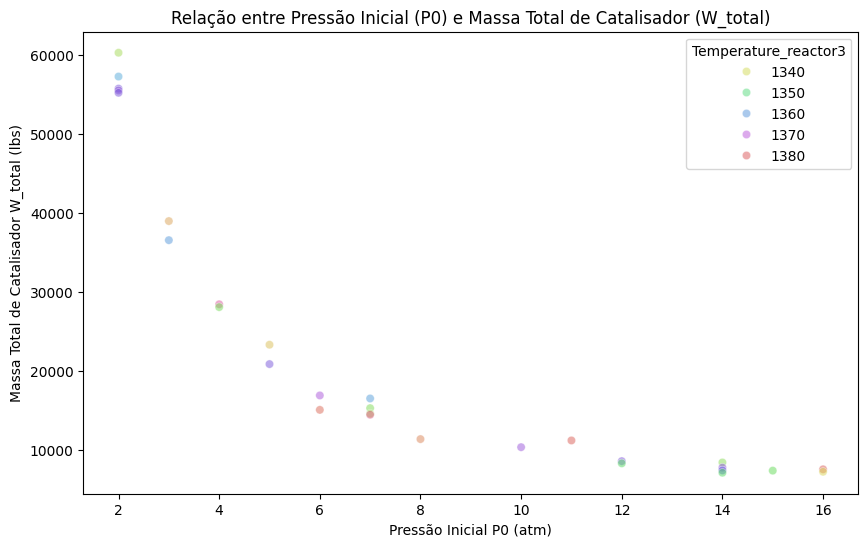

In [ ]:
# Plotando relação de W_total e P0
plt.figure(figsize=(10, 6))
sns.scatterplot(data=past_data, x='P0', y='W_total', hue='Temperature_reactor3', palette='hls', alpha=0.5)
plt.title('Relação entre Pressão Inicial (P0) e Massa Total de Catalisador (W_total)')
plt.xlabel('Pressão Inicial P0 (atm)')
plt.ylabel('Massa Total de Catalisador W_total (lbs)')
plt.show()


# Conclusões Finais

Conseguimos visualizar que, de fato, o aumento de pressão leva à uma redução significativa de massa de catalisador. A curva aparenta apresentar um comportamento exponencial, encontrando um limite mínimo de massa de catalisador próximo à 7000 lbs. 

Pelo gráfico, podemos verificar que a maior redução ocorre entre 2 atm e 8 atm, onde o pior cenário otimizado pelo enxame de partículas neste intervalo requer 60240 lbs e o melhor utiliza apenas 11412 lbs, representando uma redução de aproximadamente 81%. 

Se considerássemos a redução de massa de catalisador até o ponto de menor massa, tomaríamos a pressão inicial de atm em que foi necessário 7160 lbs de catalisador, o que representa uma redução de 88%, sendo apenas 7% menor do que quando comparado à condição de 8 atm.

Se tomarmos um princípio baseado na "Regra do Cotovelo" (Machine Learning), poderíamos escolher uma pressão de operação baseado num ponto onde há redução de Massa Total de Catalisador começa a não ser mais sensível, poderíamos escolher o ponto de 8 atm com uma certa tranquilidade, embora também pudéssemos escolher pontos próximos à ele (P0=[6,10] por exemplo). Mas, com isso, temos uma boa ideia de um intervalo de pressão que é interessante caso tenhamos limitações de custos devido ao aumento de pressão.

Em suma, quanto maior a pressão que pudermos trabalhar, menos gastaremos com catalisador, mas o aumento de pressão pode gerar a aumento de custos devido à outros gastos para manter o sistema funcional em pressões superiores.

<br>

Por fim, respondemos finalmente aos questionamentos que levaram ao desenvolvimento deste trabalho:

- A utilização de um reator sequencial otimizado em relação às condições iniciais de operação requer uma quantidade de Massa de Catalisador MUITO MENOR que no reator multitubular descrito por Fogler no exemplo 8.10, indo de 132 168,74 lbs - 28,54 lb/tubo num total de 4631 tubos no reator multitubular para valores inferiores à 60 000 lbs (mais de 58% de redução). 

- O aumento da pressão inicial do sistema reacional, indo de 2 à 8 atm, leva à uma redução de mais 80% sobre a massa do reator multileito já otimizado. Ou seja, reatores que utilizavam aproximadamente 60 000 lbs passarão a utilizar valores próximos à 11 200 lbs para a nova pressão proposta.

- Pode-se reduzir ainda mais os custos de com catalisador, embora a redução de massa catalítica necessária já não seja mais tão sensível à operações superiores à 8 atm!

